# Proyecto C&P

Desarrollar una automatización que permita extraer e interpretar la data del archivo Student-mat.csv y Student-por.csv de manera que una la información solicitada de ambos archivos y realice los requerimientos solicitados

# importar los datos  a python

In [1]:
# normalmente los archivos .csv vienen separados por , en este caso especial estan separados por ;

import pandas as pd

data_mat=pd.read_csv("student-mat.csv",sep=";") #data original como df
data_por=pd.read_csv("student-por.csv",sep=";")

data_mat


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# 1) 
Para ambos archivos:
Cree un DataFrame para cada escuela, con el formato de nombre “nombrecolegio_curso” que reúna los datos de las columnas:  school, sex, age, address, Pstatus, guardian, traveltime, studytime, failures, paid, internet, health, absences, G1,G2,G3


In [2]:
from IPython.core.display import HTML

#display(HTML(df.to_html())) # esto reemplaza nuestro print para ver los df bonitos

# Primero filtro los datos  y tomo SOLO las columnas que me pidieron
# creo un df para mat y otro para por


# Filtro por columnas

df_mat=data_mat[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime",
                 "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]
                #filtro para sacar las columnas requeridas
df_por=data_por[["school", "sex", "age", "address", "Pstatus", "guardian", "traveltime",
                 "studytime", "failures", "paid", "internet", "health", "absences", "G1","G2","G3"]]   
 
#display(HTML(df_por.to_html()))

# ahora filtro por filas para separar por colegios

df_mat_sep=df_mat.groupby(["school"]) # groupby busca  cosas repetidas  en la columna  y las agrupa
df_por_sep=df_por.groupby(["school"])

for key,group in df_mat_sep:
    
    if key=="GP":
        #print(f"la key es: {key} y el grupo es : \n{group}")
        gp_mat=group 
    
    elif key=="MS":
        #print(f"la key es: {key} y el grupo es : \n{group}") 
        ms_mat=group

for key,group in df_por_sep:
    
    if key=="GP":
        #print(f"la key es: {key} y el grupo es : \n{group}")
        gp_por=group 
    
    elif key=="MS":
        #print(f"la key es: {key} y el grupo es : \n{group}") 
        ms_por=group

        
# recorderis

# ahora tenemos lo que me pidieron

# cada colegio y curso separados

# gp_mat
# gp_por
# ms_mat
# ms_por

# cada materia ambos colegios

# df_mat
# df_por

display(HTML(gp_mat.to_html()))
display(HTML(ms_por.to_html()))


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
0,GP,F,18,U,A,mother,2,2,0,no,no,3,6,5,6,6
1,GP,F,17,U,T,father,1,2,0,no,yes,3,4,5,5,6
2,GP,F,15,U,T,mother,1,2,3,yes,yes,3,10,7,8,10
3,GP,F,15,U,T,mother,1,3,0,yes,yes,5,2,15,14,15
4,GP,F,16,U,T,father,1,2,0,yes,no,5,4,6,10,10
5,GP,M,16,U,T,mother,1,2,0,yes,yes,5,10,15,15,15
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,12,12,11
7,GP,F,17,U,A,mother,2,2,0,no,no,1,6,6,5,6
8,GP,M,15,U,A,mother,1,2,0,yes,yes,1,0,16,18,19
9,GP,M,15,U,T,mother,1,2,0,yes,yes,5,0,14,15,15


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3
423,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11
424,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12
425,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10
426,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11
427,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17
428,MS,F,15,R,T,mother,2,1,0,no,no,1,0,6,8,9
429,MS,M,16,R,A,mother,1,2,0,no,no,2,5,10,11,11
430,MS,M,16,U,A,mother,1,3,0,no,yes,5,0,10,11,11
431,MS,F,17,R,T,father,1,2,1,no,no,5,0,10,10,10
432,MS,F,17,R,T,father,1,1,1,no,yes,5,0,6,6,7


# 2
Verifique que no haya data de valor nulo (NaN), en caso de encontrar algún valor NaN se deberá eliminar toda la fila 

In [3]:
# recomendado del profe, revisen el ejemplo que esta en "semana_10_miercoles"

gp_mat=gp_mat.dropna(how="any",axis=0)#dropna elimina valores nulos, axis 0 indica filas
gp_por=gp_por.dropna(how="any",axis=0)
ms_mat=ms_mat.dropna(how="any",axis=0)
ms_por=ms_por.dropna(how="any",axis=0)

df_mat=df_mat.dropna(how="any",axis=0)
df_por=df_por.dropna(how="any",axis=0)

# 3 
Para cada escuela muestre un grafico circular(pastel) donde se evidencie el porcentaje de estudiantes hombres y mujeres de cada curso

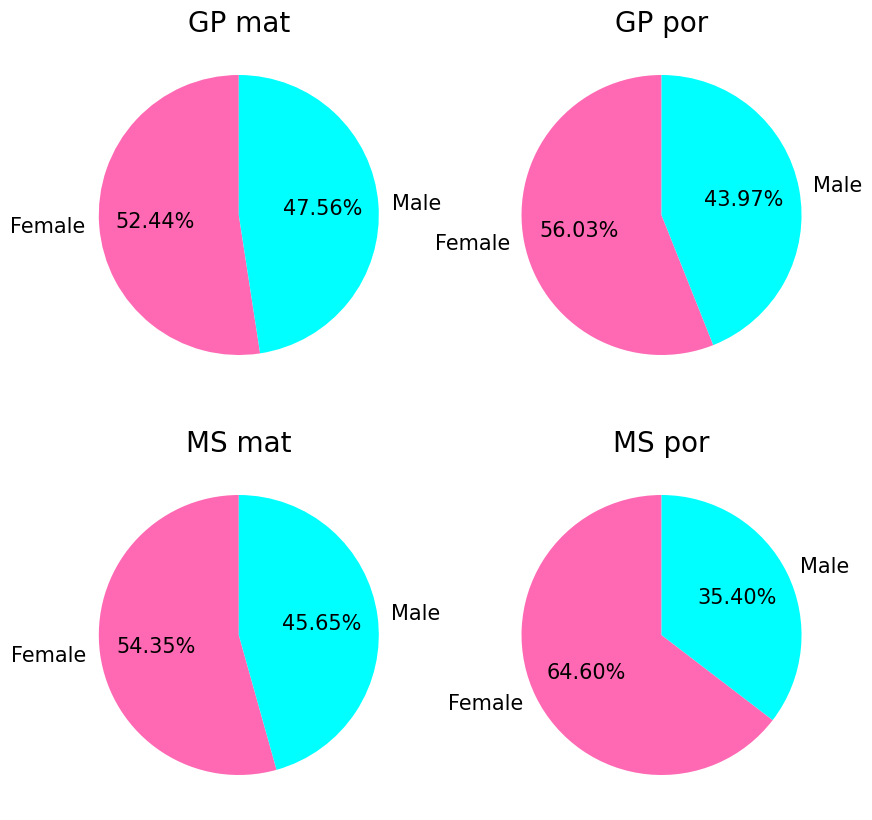

In [4]:
#print(gp_mat["sex"].value_counts()) #separa y cuenta las cosas repetidas

import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.pie(gp_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})
ax2.pie(gp_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})
ax3.pie(ms_mat["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})
ax4.pie(ms_por["sex"].value_counts(),labels=["Female","Male"],autopct="%.2f%%",colors=["hotpink","aqua"],startangle=90,textprops={"fontsize":15})

ax1.set_title("GP mat",fontsize=20)
ax2.set_title("GP por",fontsize=20)
ax3.set_title("MS mat",fontsize=20)
ax4.set_title("MS por",fontsize=20)

plt.show()






# 4 
Para cada escuela muestre un gráfico de barras donde se muestre la cantidad de estudiantes que tienen la misma edad

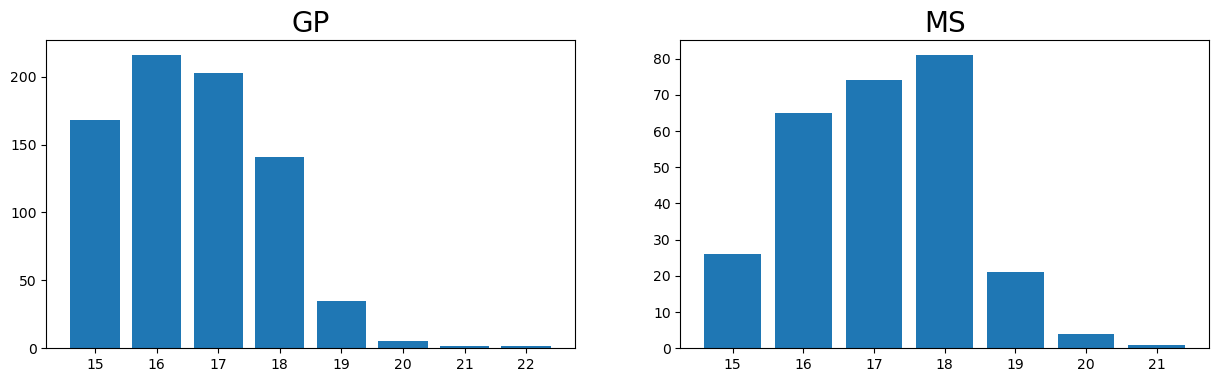

In [5]:
#necesitamos cada colegio ambas materias

# gp_mat
# gp_por
# necesito concatenar los 2 dataframe anteriores

gp=pd.concat([gp_mat,gp_por])
ms=pd.concat([ms_mat,ms_por])

#display(HTML(gp.to_html()))
#print(gp["age"].value_counts()) #separa y cuenta las cosas repetidas

plt.figure(figsize=(15,4))
ax1=plt.subplot(121)
ax2=plt.subplot(122)

ax1.bar(gp["age"].value_counts().index,gp["age"].value_counts().values)
ax2.bar(ms["age"].value_counts().index,ms["age"].value_counts().values)
ax1.set_title("GP",fontsize=20)
ax2.set_title("MS",fontsize=20)

plt.show()

# 5 
Muestre el promedio de las edades de cada curso de cada escuela

In [6]:
print("La edad promedio en la el curso de matematicas de la escuela GP es: ",gp_mat["age"].mean())
print("La edad promedio en la el curso de portugues de la escuela GP es: ",gp_por["age"].mean())
print("La edad promedio en la el curso de matematicas de la escuela MS es: ",ms_mat["age"].mean())
print("La edad promedio en la el curso de portugues de la escuela MS es: ",ms_por["age"].mean())

La edad promedio en la el curso de matematicas de la escuela GP es:  16.521489971346703
La edad promedio en la el curso de portugues de la escuela GP es:  16.666666666666668
La edad promedio en la el curso de matematicas de la escuela MS es:  18.02173913043478
La edad promedio en la el curso de portugues de la escuela MS es:  16.88938053097345


# 6
Muestre el promedio de las notas G1,G2,G3 de cada curso de cada escuela

In [7]:
grades_gp_mat = gp_mat[["G1", "G2", "G3"]]
avg_gp_mat =grades_gp_mat.mean()
print("Colegio GP curso de Matematicas \n")
print(avg_gp_mat)
print("___________________________________")

grades_gp_por = gp_por[["G1", "G2", "G3"]]
avg_gp_por =grades_gp_por.mean()
print("Colegio GP curso de Portugues \n")
print(avg_gp_por)
print("___________________________________")

grades_ms_mat = ms_mat[["G1", "G2", "G3"]]
avg_ms_mat =grades_ms_mat.mean()
print("Colegio MS curso de Matematicas \n")
print(avg_ms_mat)
print("___________________________________")

grades_ms_por = ms_por[["G1", "G2", "G3"]]
avg_ms_por =grades_ms_por.mean()
print("Colegio MS curso de Portugues \n")
print(avg_ms_por)
print("___________________________________")


Colegio GP curso de Matematicas 

G1    10.939828
G2    10.782235
G3    10.489971
dtype: float64
___________________________________
Colegio GP curso de Portugues 

G1    11.985816
G2    12.144208
G3    12.576832
dtype: float64
___________________________________
Colegio MS curso de Matematicas 

G1    10.673913
G2    10.195652
G3     9.847826
dtype: float64
___________________________________
Colegio MS curso de Portugues 

G1    10.300885
G2    10.495575
G3    10.650442
dtype: float64
___________________________________


In [8]:
# trabajo extra para saber cual fue la nota maxima 
#y asi saber si el promedio del grupo va bien o no
print("notas maximas")
print("las notas maximas en GP mat fue:\n",gp_mat[["G1", "G2", "G3"]].max())
print("las notas maximas en GP por fue:\n",gp_por[["G1", "G2", "G3"]].max())
print("las notas maximas en MS por fue:\n",ms_mat[["G1", "G2", "G3"]].max())
print("las notas maximas en MS por fue:\n",ms_por[["G1", "G2", "G3"]].max())
print("_______________________________________")
print("notas minimas")
print("las notas maximas en GP mat fue:\n",gp_mat[["G1", "G2", "G3"]].min())
print("las notas maximas en GP por fue:\n",gp_por[["G1", "G2", "G3"]].min())
print("las notas maximas en MS por fue:\n",ms_mat[["G1", "G2", "G3"]].min())
print("las notas maximas en MS por fue:\n",ms_por[["G1", "G2", "G3"]].min())

notas maximas
las notas maximas en GP mat fue:
 G1    19
G2    19
G3    20
dtype: int64
las notas maximas en GP por fue:
 G1    18
G2    19
G3    19
dtype: int64
las notas maximas en MS por fue:
 G1    19
G2    18
G3    19
dtype: int64
las notas maximas en MS por fue:
 G1    19
G2    18
G3    19
dtype: int64
_______________________________________
notas minimas
las notas maximas en GP mat fue:
 G1    3
G2    0
G3    0
dtype: int64
las notas maximas en GP por fue:
 G1    0
G2    6
G3    0
dtype: int64
las notas maximas en MS por fue:
 G1    6
G2    5
G3    0
dtype: int64
las notas maximas en MS por fue:
 G1    4
G2    0
G3    0
dtype: int64


# 7
Grafique el promedio de las notas en un gráfico de barras horizontal

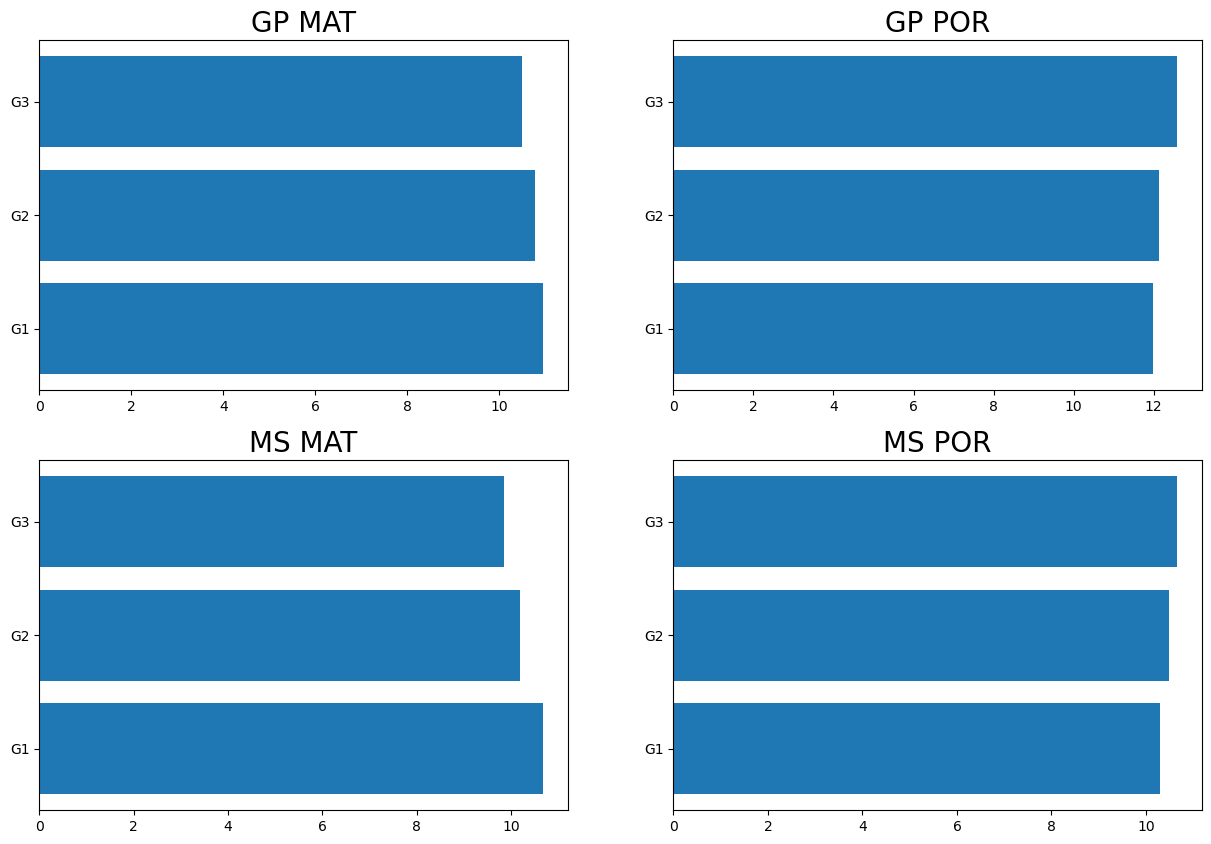

In [9]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.barh(avg_gp_mat.index,avg_gp_mat.values)
ax2.barh(avg_gp_por.index,avg_gp_por.values)
ax3.barh(avg_ms_mat.index,avg_ms_mat.values)
ax4.barh(avg_ms_por.index,avg_ms_por.values)

ax1.set_title("GP MAT",fontsize=20)
ax2.set_title("GP POR",fontsize=20)
ax3.set_title("MS MAT",fontsize=20)
ax4.set_title("MS POR",fontsize=20)

plt.show()

# 8
Halle el valor máximo de las ausencias y considere dicho valor como el total de clases del curso, de manera que pueda sacar un porcentaje de asistencia para cada estudiante

In [10]:
tc_gp_mat=gp_mat["absences"].max()
tc_gp_por=gp_por["absences"].max()
tc_ms_mat=ms_mat["absences"].max()
tc_ms_por=ms_por["absences"].max()
print("El total de clases de gp mat es :",tc_gp_mat)
print("El total de clases de gp por es :",tc_gp_por)
print("El total de clases de ms mat es :",tc_ms_mat)
print("El total de clases de ms por es :",tc_ms_por)

#OJO!!!!!
# como em pidieron "Halle el valor máximo de las ausencias y considere dicho valor
#como el total de clases del curso" de manera general, me estan diciendo que halle el maximo
#entre las 4 y considere ese nuemro como el total de clases para todos los cursos

total_clases=max([tc_gp_mat,tc_gp_por,tc_ms_mat,tc_ms_por])
print("El total de clases es:",total_clases)


El total de clases de gp mat es : 75
El total de clases de gp por es : 32
El total de clases de ms mat es : 17
El total de clases de ms por es : 12
El total de clases es: 75


In [11]:
 #porcentaje de asistencia para cada estudiante

def per_attendace(total_clases,abscenses):
    
    per= (100*(total_clases-abscenses))/total_clases
    
    return per


# 9
Cree una nueva columna llamada “extra”

In [12]:
import numpy as np

gp_mat['extra']=0
gp_por['extra']=0
ms_mat['extra']=0
ms_por['extra']=0

#display(HTML(gp_mat.to_html()))

# 10
Cree una nueva columna llamada “approved” en la cual determine si el estudiante aprueba o reprueba el curso (1 para aprueba, 0 para reprueba), considerando:


In [13]:
gp_mat['approved']=0
gp_por['approved']=0
ms_mat['approved']=0
ms_por['approved']=0
#display(HTML(gp_mat.to_html()))

- Si el estudiante tiene un porcentaje de asistencia menor al 80% del curso reprueba 
- Si el estudiante tiene un porcentaje de asistencia mayor al 80% del curso, pero la nota G3 es menor a 10 reprueba
- Si el estudiante tiene un porcentaje de asistencia mayor al 80% del curso, pero la nota G3 esta entre 10 y 15 aprueba y se asigna 1 a la columna extra
- Si el estudiante tiene un porcentaje de asistencia mayor al 80% del curso y la nota G3 es mayor a 15 aprueba y se asigna 0 a la columna extra


In [14]:
def aprov(per,g3):
    
    if per < 80:
        approved =0
        extra = 0
        
    else:
        if g3 <10:
            approved =0
            extra = 0
            
        elif 10 <= g3 <= 15:
            approved =1
            extra = 1
        elif 15 < g3:
            approved =1
            extra = 0
    return approved,extra

# approved,extra=aprov(80,12)
# print(approved)
# print(extra)

In [15]:
#display(HTML(gp_mat.to_html()))

# para el colegio gp_mat

for index in range(len(gp_mat)):
    
    abscences=gp_mat["absences"][index]
    g3=gp_mat["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    gp_mat["approved"][index]=int(approved)
    gp_mat["extra"][index]=int(extra)
    
    
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
#display(HTML(gp_mat.to_html()))    
   

C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\98811632.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_mat["approved"][index]=int(approved)
C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\98811632.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_mat["extra"][index]=int(extra)


In [16]:
# para el colegio gp_por

for index in range(len(gp_por)):
    
    abscences=gp_por["absences"][index]
    g3=gp_por["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    gp_por["approved"][index]=int(approved)
    gp_por["extra"][index]=int(extra)
    
    
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
display(HTML(gp_por.to_html()))    

C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\2488589584.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_por["approved"][index]=int(approved)
C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\2488589584.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gp_por["extra"][index]=int(extra)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,GP,F,18,U,A,mother,2,2,0,no,no,3,4,0,11,11,1,1
1,GP,F,17,U,T,father,1,2,0,no,yes,3,2,9,11,11,1,1
2,GP,F,15,U,T,mother,1,2,0,no,yes,3,6,12,13,12,1,1
3,GP,F,15,U,T,mother,1,3,0,no,yes,5,0,14,14,14,1,1
4,GP,F,16,U,T,father,1,2,0,no,no,5,0,11,13,13,1,1
5,GP,M,16,U,T,mother,1,2,0,no,yes,5,6,12,12,13,1,1
6,GP,M,16,U,T,mother,1,2,0,no,yes,3,0,13,12,13,1,1
7,GP,F,17,U,A,mother,2,2,0,no,no,1,2,10,13,13,1,1
8,GP,M,15,U,A,mother,1,2,0,no,yes,1,0,15,16,17,0,1
9,GP,M,15,U,T,mother,1,2,0,no,yes,5,0,12,12,13,1,1


Para el colegio ms necesitamos reiniciar el index, recordando que cuando partimos el df los index empezaban por un numero diferente de 0

In [19]:
ms_mat = ms_mat.reset_index()
del ms_mat['index']
#display(HTML(ms_mat.to_html())) 

In [21]:
# para el colegio ms_mat


for index in range(len(ms_mat)):
    
    abscences=ms_mat["absences"][index]
    g3=ms_mat["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    ms_mat["approved"][index]=int(approved)
    ms_mat["extra"][index]=int(extra)
    
    
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
display(HTML(ms_mat.to_html()))    
   

C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\1168911809.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_mat["approved"][index]=int(approved)
C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\1168911809.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_mat["extra"][index]=int(extra)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,MS,M,18,R,T,mother,2,1,1,no,yes,5,10,11,13,13,1,1
1,MS,M,19,R,T,other,3,2,3,no,yes,2,8,8,7,8,0,0
2,MS,M,17,U,T,mother,2,2,0,yes,yes,3,2,13,13,13,1,1
3,MS,M,18,U,T,mother,1,1,1,no,yes,3,7,8,7,8,0,0
4,MS,M,19,R,T,other,3,1,1,no,yes,5,4,8,8,8,0,0
5,MS,M,17,R,T,mother,2,2,0,yes,yes,2,4,13,11,11,1,1
6,MS,F,18,U,T,father,1,2,0,no,no,5,0,10,9,9,0,0
7,MS,F,17,R,T,father,2,2,0,yes,yes,5,4,12,13,13,1,1
8,MS,F,17,U,A,mother,2,2,0,no,no,5,2,12,12,11,1,1
9,MS,M,18,U,T,father,2,1,0,no,yes,3,4,10,10,10,1,1


In [20]:
ms_por = ms_por.reset_index()
del ms_por['index']
#display(HTML(ms_por.to_html())) 


In [22]:
# para el colegio ms_por

for index in range(len(ms_por)):
    
    abscences=ms_por["absences"][index]
    g3=ms_por["G3"][index]
    porcentaje=per_attendace(total_clases,abscences)
    approved,extra=aprov(porcentaje,g3)
    ms_por["approved"][index]=int(approved)
    ms_por["extra"][index]=int(extra)
    
    
#     print("falta: ",abscences)
#     print(" porcentaje : ",porcentaje ,"%")
#     print("G3: ",g3)
#     print("aprovado: {}, trabajo extra: {}".format(approved,extra))
    
display(HTML(ms_por.to_html()))   

C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\1573803707.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_por["approved"][index]=int(approved)
C:\Users\joseb\AppData\Local\Temp\ipykernel_3116\1573803707.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ms_por["extra"][index]=int(extra)


,school,sex,age,address,Pstatus,guardian,traveltime,studytime,failures,paid,internet,health,absences,G1,G2,G3,extra,approved
0,MS,F,16,U,T,father,2,1,0,no,yes,5,11,10,11,11,1,1
1,MS,F,16,R,T,mother,2,2,0,no,yes,5,0,12,12,12,1,1
2,MS,F,15,R,T,mother,1,1,1,no,no,2,6,10,10,10,1,1
3,MS,F,15,R,T,mother,2,1,0,no,yes,5,4,10,10,11,1,1
4,MS,F,16,R,T,mother,2,2,0,no,no,5,0,16,17,17,0,1
5,MS,F,15,R,T,mother,2,1,0,no,no,1,0,6,8,9,0,0
6,MS,M,16,R,A,mother,1,2,0,no,no,2,5,10,11,11,1,1
7,MS,M,16,U,A,mother,1,3,0,no,yes,5,0,10,11,11,1,1
8,MS,F,17,R,T,father,1,2,1,no,no,5,0,10,10,10,1,1
9,MS,F,17,R,T,father,1,1,1,no,yes,5,0,6,6,7,0,0


# 11
Grafique el porcentaje de alumnos aprobados de cada curso

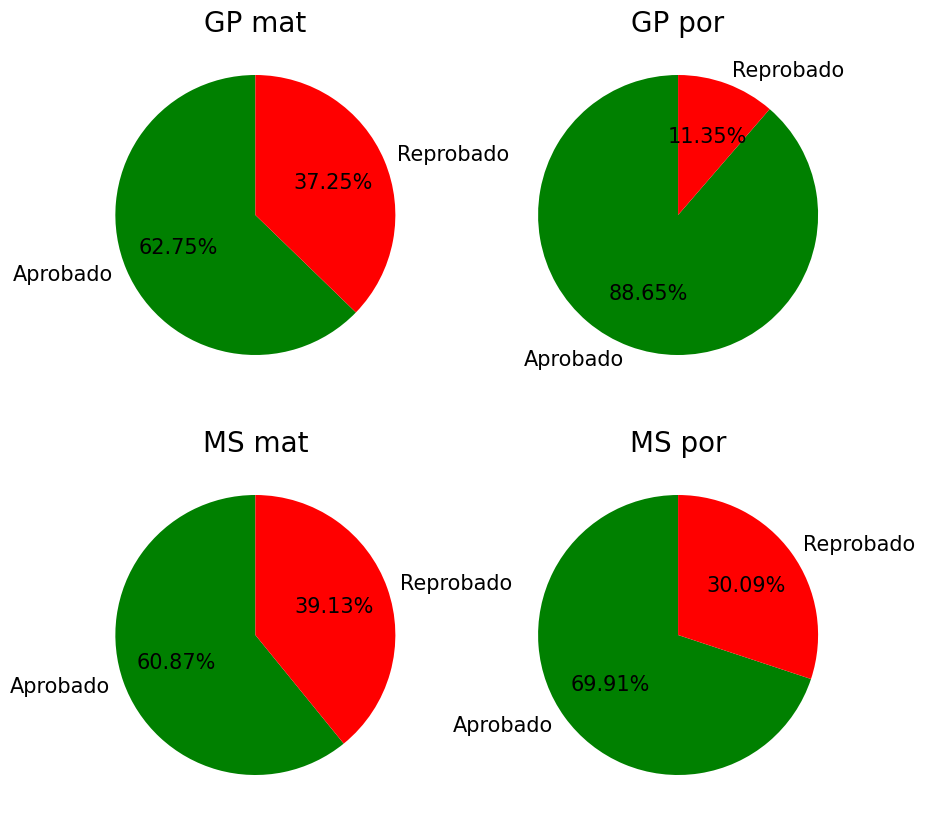

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
ax1=plt.subplot(221)
ax2=plt.subplot(222)
ax3=plt.subplot(223)
ax4=plt.subplot(224)

ax1.pie(gp_mat["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})
ax2.pie(gp_por["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})
ax3.pie(ms_mat["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})
ax4.pie(ms_por["approved"].value_counts(),labels=["Aprobado","Reprobado"],autopct="%.2f%%",colors=["green","red"],startangle=90,textprops={"fontsize":15})

ax1.set_title("GP mat",fontsize=20)
ax2.set_title("GP por",fontsize=20)
ax3.set_title("MS mat",fontsize=20)
ax4.set_title("MS por",fontsize=20)

plt.show()



In [28]:
# trabajo extra, cuantos estudiantes deben presentar  trabajo extra para cada curso?

gp_mat["extra"].value_counts()

1    184
0    165
Name: extra, dtype: int64

Resultado:
1.	Generar un archivo en formato csv con nombre: “Resultado + Fecha en la que se ejecuta el script”, este archivo debe quedar en la carpeta donde se encuentren los datos originales y el archivo de Python
2.	Entregar en un archivo PDF todas las gráficas solicitadas


### 2 opciones para guardar

In [30]:
# guarda cada dataframe como un archivo independiente

from datetime import datetime

date = datetime.now().strftime("%d-%m-%Y")
print(date)


#Guardando los dataframes en un archivo .csv
def guardarCSV(df, nombre, fecha):
    nombre = nombre + "_" + fecha + '.csv'
    print(nombre)
    df.to_csv(nombre, index = True)

guardarCSV(gp_mat, "Resultado_GP_Matematicas", date)
guardarCSV(gp_por, "Resultado_GP_Portugues", date)
guardarCSV(ms_mat, "Resultado_MS_Matematicas", date)
guardarCSV(ms_por, "Resultado_MS_Portugues", date)

21-01-2023
Resultado_GP_Matematicas_21-01-2023.csv
Resultado_GP_Portugues_21-01-2023.csv
Resultado_MS_Matematicas_21-01-2023.csv
Resultado_MS_Portugues_21-01-2023.csv


In [ ]:
# combina todos los dataframe y los guarda en un solo archivo
#Guardar csv
today = str(datetime.date.today())
name= "Resultado_" + today+".csv"

GP_mat.to_csv(name, header = True, index = False)
GP_por.to_csv(name, header = True, index = False, mode="a")
MS_mat.to_csv(name, header = True, index = False, mode="a")
MS_por.to_csv(name, header = True, index = False, mode="a")